In [1]:
%matplotlib inline 
from skimage.io import imshow, imread, imsave 
import numpy as np
import sys
import random
import math as ma

In [88]:
def MSE(Pr,Exp_Pr):
    a = abs(Pr-Exp_Pr)
    return sum(a.T)/10

def Result(Predict):
    otv,a = np.where(np.array(Predict) == max(Predict))
    otv =np.append(otv,max(Predict))
    #print(max(Predict),'——',otv)
    return otv
    
def CorrectPredict(Predict):
    summ = sum(Predict)
    return Predict / summ

def TestLoss_():
    TestLoss = [0,0,0,0,0,0,0,0,0,0]
    for x in range(test_count,220):
        img = imread('Desktop/LEARNING/{}.png'.format(x))
        tabe = np.array(img)/255
        tabe = tabe.reshape(784,1)
        expected_p = np.zeros(10)
        expected_p[x%10] = 1.0
        Pr = NetWork.Predict(tabe)
        TestLoss[x%10]+=(MSE(NetWork.Predict(tabe).T,expected_p)[0])
    TL= np.array(TestLoss)/2
    TL = sum(TL)/10
    return TL
   

In [3]:
class First_net(object): 

    def __init__(self,Neirons = 0): 
        self.Weights = []
        self.Outputs = []
        self.S_L_R=0.001
        for i in range(len(Neirons)-1):
            Layer_W = np.random.normal(0., .1 ,(Neirons[i+1],Neirons[i]))
            self.Weights.append(Layer_W)
        self.sigmoid_maper = np.vectorize(self.sigmoid) 
        self.ReLuPr_m = np.vectorize(self.ReLuPr)
        self.learningRate = self.S_L_R

    def Set_L_R(self, L_R):
        self.S_L_R = L_R
        self.learningRate = self.S_L_R 
        
    def sigmoid(self,x): 
        a = max(0.0,x)
        return a 
    
    def ReLuPr(self, x):
        if x<0:
            a = 0.01
            return a
        else:
            a = 1.0
            return a
    
    def MSET(self ,Pr,Exp_Pr):
        a = (Pr-Exp_Pr)
        return a
    
    def Predict(self,inputs):
        output = inputs
        self.Outputs = []
        for step in range(len(Neirons)-2):
            input_ = np.dot(self.Weights[step],output)
            output = self.sigmoid_maper(input_)
            self.Outputs.append(output)
        
        input_=np.dot(self.Weights[len(Neirons)-2],output)
        output = self.sigmoid_maper(input_)
        
        #output = self.CorrectPredict(output)
        
        self.Outputs.append(output)
        
        return output


    def Traning(self, inputs, expected_p):
        
        q = self.Predict(inputs).T
       
        errors = []
        Ws_delta = []
        error = np.array(self.MSET(q,expected_p)[0])
        W_delta = self.ReLuPr_m(q)*error
        Ws_delta.append(W_delta)
        errors.append(error)
        for i in range(len(Neirons)-2,0,-1):
            errore = np.dot(self.Weights[i].T,error.T).T
            errors.append(errore)
            error = errore
            
            q = self.Outputs[i-1].T
            W_delta =self.ReLuPr_m(q)*error
            Ws_delta.append(W_delta.T)
        
        Ws_delta.reverse()
        #errors.reverse()
        Ws_delta[-1] = Ws_delta[-1].T
        
        Delta =np.dot(Ws_delta[0],inputs.T)
        self.Weights[0] -=Delta*self.learningRate #np.dot(Ws_delta[0],inputs.T)*self.learningRate
        for i in range(1,len(self.Weights)):
            Delta =np.dot(Ws_delta[i],self.Outputs[i-1].T)
            self.Weights[i] -=Delta*self.learningRate #np.dot(Ws_delta[i],self.Outputs[i-1].T)*self.learningRate   

In [77]:
Input_n = 784
Output_n = 10
Neirons = []
Neirons.append(Input_n)
Count_HL = int(input('Введите колличество слоёв сети — '))
for i in range(1,Count_HL+1):
    Neirons.append(int(input("Колличество нейронов в {} -ом слое = ".format(i))))
Neirons.append(Output_n)
NetWork = First_net(Neirons = Neirons) 

Введите колличество слоёв сети — 4
Колличество нейронов в 1 -ом слое = 60
Колличество нейронов в 2 -ом слое = 50
Колличество нейронов в 3 -ом слое = 40
Колличество нейронов в 4 -ом слое = 30


In [98]:
NetWork = First_net(Neirons = Neirons) 

In [78]:
tabe = np.zeros(784).reshape(28,28)
test_count = 200
epochs = int(input('Клличество эпох обучения == '))

Клличество эпох обучения == 1000


In [107]:
NetWork.Set_L_R(float(input('Ставка обучения == '))) 

Ставка обучения == 0.0005


In [108]:
## Подгрузка тестовых материалов
imgs = []
nums = []
for x in range(test_count):
    imgs.append(imread('Desktop/LEARNING/{}.png'.format(x)))
    nums.append(x) 

In [109]:
## ТРЕНИРОВКА
minLoss = 1.0
Tloss = TestLoss_()
for a in range(epochs):
    random.shuffle(nums)
    losses=[]
    for x in nums:
        img = imgs[x]
        tabe = np.array(img)/255
        tabe = tabe.reshape(784,1) 
        expected_p = np.zeros(10)
        expected_p[x%10] = 1.0
        NetWork.Traning(tabe,expected_p.T)
        losses.append(MSE(NetWork.Predict(tabe).T,expected_p)[0])
    loss = (sum(losses)/test_count)
    if (Tloss<minLoss) and (loss<0.10):
        minLoss = Tloss
        np.save('TMP_min_W.npy',NetWork.Weights)
    Prog =(a+1)/epochs*100
    if (Prog%5 == 0):
        Tloss = TestLoss_()
    sys.stdout.write("\rProgress — {}_% and Loss — {}, and Test loss {} ".format(str(Prog)[:3],str(loss),Tloss))    
            

Progress — 100_% and Loss — 0.0001683060101951176, and Test loss 0.09522143976703329  

In [110]:
print(minLoss)
NetWork.Weights = np.load('TMP_min_W.npy')

0.000770428312029087


##ТРЕНИРОВКА СТАРАЯ

for a in range(epochs):
    losses=[]
    for x in range(test_count):
        img = imread('Desktop/LEARNING/{}.png'.format(x))
        tabe = np.array(img)/255
        tabe = tabe.reshape(784,1) 
        expected_p = np.zeros(10)
        expected_p[x%10] = 1.0
        NetWork.Traning(tabe,expected_p.T)
        losses.append(MSE(NetWork.Predict(tabe).T,expected_p)[0])
    loss = (sum(losses)/test_count)
    Prog =(a+1)/epochs*100
    sys.stdout.write("\rProgress — {}_% and Loss — {} ".format(str(Prog)[:3],str(loss)))

In [87]:
## АНАЛИЗ ПОСЛЕ ТРЕНИРОВКИ

TestLoss = [0,0,0,0,0,0,0,0,0,0]
for x in range(test_count,220):
    img = imread('Desktop/LEARNING/{}.png'.format(x))
    tabe = np.array(img)/255
    tabe = tabe.reshape(784,1)
    expected_p = np.zeros(10)
    expected_p[x%10] = 1.0
    Pr = NetWork.Predict(tabe)
    TestLoss[x%10]+=(MSE(NetWork.Predict(tabe).T,expected_p)[0])
TL= np.array(TestLoss)/2
print(TL)

[0.16961996 0.17835545 0.17293955 0.17941578 0.18521927 0.16953582
 0.17682429 0.15729011 0.16884029 0.18086032]


[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.97677416]]
Net give an answer —— 9.0 with 97._% Expext answer —— 9


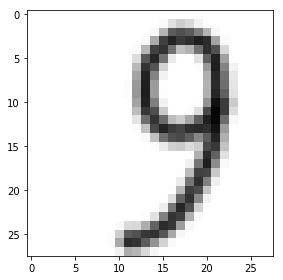

In [68]:
a = 19 #input("Выберети цыфру - ")
imge = imread('Desktop/LEARNING/{}.png'.format(a))
tabe = (np.array(imge)/255).reshape(784,1)
otv = Result(NetWork.Predict(tabe))
print(NetWork.Predict(tabe))
print("Net give an answer —— {} with {}_% Expext answer —— {}".format(otv[0],str(otv[1]*100)[:3],a%10))
imshow(imge)

[[0.        ]
 [0.        ]
 [0.        ]
 [0.00345146]
 [0.        ]
 [0.68000969]
 [0.31653885]
 [0.        ]
 [0.        ]
 [0.        ]]
Net give an answer —— 5.0 with 68._% Expext answer —— 0


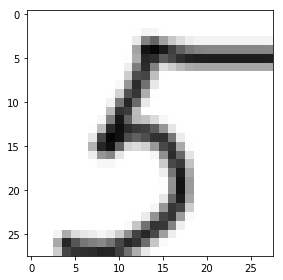

In [69]:
a = 0 #input("Выберети цыфру - ")
imge = imread('Desktop/TESTS_1/{}.png'.format(a))
tabe = (np.array(imge)/255).reshape(784,1)
otv = Result(CorrectPredict(NetWork.Predict(tabe)))
print(CorrectPredict(NetWork.Predict(tabe)))
print("Net give an answer —— {} with {}_% Expext answer —— {}".format(otv[0],str(otv[1]*100)[:3],a%10))
imshow(imge)

In [261]:
np.save('Vesa.npy',NetWork.Weights)

In [427]:
S_Weights=NetWork.Weights

In [144]:
NetWork.Weights = np.load('Vesa.npy')